Example of using [scipy.integrate.solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html) to integrate a series of ordinary DEQs

In [1]:
from scipy.integrate import solve_ivp
import numpy as np
from math import sqrt

In [2]:
# the series of ODE's is incorporated in to a single function
# y: array-like set of dependent parameters
# t: the independent parameter, also array-like to return solutions at an arbitrary number of points
def func(t, y, m, air_k):
    g = 9.81
#    m = params[0]
#    air_k = params[1]
    v = sqrt(y[1]*y[1] + y[3]*y[3])
    f0 = y[1]                          # f_ri
    f1 = -air_k * v * y[1] / m         # f_vi
    f2 = y[3]                          # f_rj
    f3 = -air_k * v * y[3] / m - g     # f_vj
    return [f0,f1,f2,f3]

# this function defines a stopping condition
# it's interface must match the function
def hit_ground(t, y, m, air_k):
    return y[2]
hit_ground.terminal = True
hit_ground.direction = -1  # direction of travel whn satisfying the zero crossing condition

In [3]:
#starting coordinates
y0=[0,10,0,10]   # x=0, vx=10 m/s, y=0, vy=10 m/s

# m, air_k specified as parameters and passed to the function
params=(1.0, 0.12)

# solve for trajectory from t=0 to 1.6 seconds, in 200 steps
t = np.linspace(0,1.6,200)
sol = solve_ivp(func, [0,1.6], y0, t_eval=t, events=[hit_ground], args=params)
print(sol.message)

A termination event occurred.


The solution is returned as a [scipy.integrate.OdeSolution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.OdeSolution.html) object.  You'll need to explore the structure of this object to understand its structure.

```
>>> dir(sol)

['message',
 'nfev',
 'njev',
 'nlu',
 'sol',
 'status',
 'success',
 't',
 't_events',
 'y',
 'y_events']
```

In [4]:
# time of first instance of first event
print(f"Hitting ground at t = {sol.t_events[0][0]:.3f} seconds")

# 2D array of y_values at evaluation points
yf=sol.y
# times of evalyation points, notice that this is tructacted compared to our original t array
t=sol.t  

Hitting ground at t = 1.504 seconds


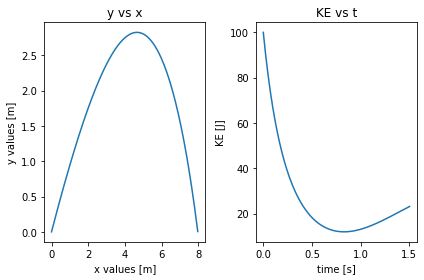

In [5]:
from matplotlib import pyplot as plt

x=np.array(yf[0])
vx=np.array(yf[1])
y=np.array(yf[2])
vy=np.array(yf[ 3])
ke = 0.5 * params[0] * (vx*vx+vy*vy)

plt.subplot(1, 2, 1)
plt.plot(x,y,'-')
plt.xlabel('x values [m]')
plt.ylabel('y values [m]')
plt.title('y vs x')

plt.subplot(1, 2, 2)
plt.plot(t,ke,'-')
plt.xlabel('time [s]')
plt.ylabel('KE [J]')
plt.title('KE vs t')

plt.tight_layout() 
plt.show()